# Figure 3 & Figure 4

Plot for Devils simulation with and without DFTD

In [1]:
import json
import subprocess
import sys
import math
import numpy
import re
import matplotlib.pyplot as plt
import time
import pickle
from Parameter_Sweeps_ssh.DevilsDFTD2StageInfection import DevilsPreVaccination


## Read in observed data

In [2]:
import pandas as pd
import numpy as np# pop_data = pd.read_csv('../year_data/devil_data_v2.csv')
pop_data = pd.read_csv('month_data/Devils_Dataset__Population_1985-2020.csv')

devil_pop = np.array(pop_data['Population'].iloc[:].values)
dates = []
year = 1985
while len(dates) < len(devil_pop):
    for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]:
        dates.append(f"{month} {year}")
    year += 1

obs = np.vstack([devil_pop]).reshape(1, 1, -1)
carry_cap = int(max(devil_pop)*1.16)


## Load Simulation data and Paramter Sweeps

In [3]:
with open('Fig3_Fig4-data.p','rb') as fd:
    sim_data = pickle.load(fd)
    
    variables = sim_data['variables']
    sweeps = sim_data['sweeps']
    eresults = sim_data['eresults']
    eresults2 = sim_data['eresults2']
    mean_std_db = sim_data['mean_std_db']


## Plotting functions and helpers

In [4]:
def make_filename(variables):
    cmdpath="/home/brian/research/devils_dftd_modeling/Parameter_Sweeps_ssh/"
    ret = cmdpath+'/ps-'
    for k in sorted(variables.keys()):
        v = float(variables[k])
        x = f"{v:.4e}"
        ret+=f"{x},"
    return ret

In [5]:
def get_mean_std(var):
    f = make_filename(var)
    if f in mean_std_db:
        return mean_std_db[f]

In [6]:
def plot_eresult(eresults): 
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
    fig, ax1 = plt.subplots(figsize=[12, 6])

    plt.title("Tasmanian Devil Population with DFTD: Observed vs. Simulated", fontsize=18)
    ax1.set_xlabel(f"Time (months) since {dates[0]}", fontsize=16)
    ax1.set_ylabel("Population of Tasmanian Devils", fontsize=16)
    ax1.plot(eresults[0]['time'], obs[0][0], '--', color='black', label='Observed Total')
    ax1.plot(eresults[0]['time'], eresults[0]['Devils'], color='blue', label='Simulated Total')
    ax1.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
    ax1.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
    ax1.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
    ax1.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
    ax1.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
    ax1.plot([variables['DFTD_start'], variables['DFTD_start']], [-3000, carry_cap], '--k', alpha=0.4)
    ax1.text(variables['DFTD_start']-7, 5000, "DFTD Start", rotation="vertical", color="black", fontsize=14)
    ax1.text(variables['DFTD_start']-7, 24000, dates[variables['DFTD_start']], rotation="vertical", color="black", fontsize=14)
    #ax1.set_xlim([0, result[0]['time'][-1]])
    #ax1.set_ylim([-3000, max(devil_pop)*1.25])
    ax1.tick_params(axis='x', labelsize=12)
    ax1.set_yticks([20000,40000,60000])
    ax1.tick_params(axis='y',labelsize=12, labelrotation=90)
    ax1.legend(loc='upper right', fontsize=16)
    ax1.set_ylim([0, carry_cap])
    ax1.set_xlim(0,eresults[0]['time'][-1])
    for n,r in enumerate(eresults):
        if n==0: continue
        ax1.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.025)
        ax1.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
        ax1.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
        ax1.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
        ax1.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
        ax1.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')

#     ax2 = plt.axes([0,0,1,1])
#     # Manually set the position and relative size of the inset axes within ax1
#     ip = InsetPosition(ax1, [0.25,0.55,0.175,0.25])
#     ax2.set_axes_locator(ip)
#     # Mark the region corresponding to the inset axes on ax1 and draw lines
#     # in grey linking the two axes.
#     mark_inset(ax1, ax2, loc1=4, loc2=3, fc="none", ec='0.5')

#     # plot in the inset
#     inst=155
#     ined=inst+31
#     #ax2.plot(range(len(devil_pop))[inst:ined], devil_pop[inst:ined], '--k', label='Observed Total')
#     #ax2.plot(eresults[0]['time'][inst:ined], eresults[0]['Devils'][inst:ined],'b', label="Simulation")
#     ax2.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
#     ax2.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
#     ax2.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
#     ax2.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
#     ax2.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
#     for n,r in enumerate(eresults):
#         if n==0: continue
#         #ax2.plot(eresults[n]['time'][inst:ined], eresults[n]['Devils'][inst:ined],'b', alpha=0.05)
#         ax2.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.03)
#         ax2.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
#         ax2.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
#         ax2.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
#         ax2.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
#         ax2.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')
        
#     ax2.set_xlim(inst,ined-1)
#     ax2.set_ylim(2000,7000)
#     #ax2.set_yticks([49000,54000])
#     ax2.tick_params(axis='y', labelrotation=90)

    #plt.tight_layout()
    #plt.savefig("DevilsDFTD_Data_DFTDsim.pdf")
    print(variables)
    
    def calculate_distance(eresults):
        '''return mean/stddev of L2 norm distance'''
        global obs
        dists = np.zeros(len(eresults))
        for n,r in enumerate(eresults):
            dists[n] = np.linalg.norm(r['Devils']-obs[0][0],2)
        return np.average(dists), np.std(dists)

    dist_l2 = calculate_distance(eresults)
    print(f"L2 = {dist_l2[0]:.2f} +/-{dist_l2[1]:.2f}")



In [7]:
def plot_sweep(name):
    xvals = numpy.zeros(len(sweeps[name]))
    mvals = numpy.zeros(len(sweeps[name]))
    svals = numpy.zeros(len(sweeps[name]))
    for n,v in enumerate(sweeps[name]):
        c = variables.copy()
        c[name] = float(v)
        keepgoing=True
        while keepgoing:
            try:
                (m,s) = get_mean_std(c)
                xvals[n]=c[name]
                mvals[n]=m
                svals[n]=s
                keepgoing=False
            except Exception as e:
                print(f"caught e={e} while name={name} ")
                time.sleep(1)
    
    plt.figure(figsize=[12, 6])
    plt.errorbar(xvals,mvals,yerr=svals, capsize=10)
    plt.plot([variables[name], variables[name]],[0, max(mvals)],'--')
    plt.xlabel(name, fontsize=12)
    plt.ylabel('Error', fontsize=12)

# Run Parameter Sweep

In [9]:
print(sweeps)

{'juvenile_concentration': ['4.4581e-01', '4.7058e-01', '4.8296e-01', '4.9534e-01', '5.0773e-01', '5.2011e-01', '5.4488e-01', '5.6965e-01'], 'birth_rate': ['4.9500e-02', '5.2250e-02', '5.3625e-02', '5.5000e-02', '5.6375e-02', '5.7750e-02', '6.0500e-02', '6.3250e-02'], 'maturity_rate': ['3.7503e-02', '3.9586e-02', '4.0628e-02', '4.1670e-02', '4.2712e-02', '4.3754e-02', '4.5837e-02', '4.7920e-02'], 'death_rate_juvenile': ['5.4000e-03', '5.7000e-03', '5.8500e-03', '6.0000e-03', '6.1500e-03', '6.3000e-03', '6.6000e-03', '6.9000e-03'], 'death_rate_susceptible': ['2.1015e-02', '2.2182e-02', '2.2766e-02', '2.3350e-02', '2.3934e-02', '2.4518e-02', '2.5685e-02', '2.6852e-02'], 'death_rate_over_population': ['2.0700e-07', '2.1850e-07', '2.2425e-07', '2.3000e-07', '2.3575e-07', '2.4150e-07', '2.5300e-07', '2.6450e-07'], 'infection_rate_infected': ['9.9000e-06', '1.0450e-05', '1.0725e-05', '1.1000e-05', '1.1275e-05', '1.1550e-05', '1.2100e-05', '1.2650e-05'], 'infection_rate_diseased': ['2.8800e-0

In [10]:
variables

{'juvenile_concentration': 0.49534348836011316,
 'birth_rate': 0.055,
 'maturity_rate': 0.04167,
 'death_rate_juvenile': 0.006,
 'death_rate_over_population': 2.3e-07,
 'death_rate_susceptible': 0.02335,
 'incubation': 10,
 'progression': 10.746230534983676,
 'infection_rate_diseased': 3.2e-05,
 'infection_rate_infected': 1.1e-05,
 'death_rate_diseased': 0.29134996217062514,
 'death_rate_infected': 0.01966,
 'DFTD_start': 97}

In [11]:
print("Parameter                sweep min value  current value")
print("---------                ---------------  -------------")
for name in ['infection_rate_infected','infection_rate_diseased',
             'incubation','progression','death_rate_infected',
             'death_rate_diseased','DFTD_start']:
    xvals = numpy.zeros(len(sweeps[name]))
    mvals = numpy.zeros(len(sweeps[name]))
    svals = numpy.zeros(len(sweeps[name]))
    for n,v in enumerate(sweeps[name]):
        c = variables.copy()
        c[name] = float(v)
        try:
            (m,s) = get_mean_std(c)
            xvals[n]=c[name]
            mvals[n]=m
            svals[n]=s
        except Exception as e:
            print(f"caught e={e} while name={name} ")
    minx=math.inf
    for n in range(len(xvals)):
        if mvals[n] < minx:
            minx=mvals[n]
            minn=n
    #print(n,minx,xvals[minn],mvals[minn])
    print(f"{name} {' '*(23-len(name))} {xvals[minn]} {' '*(15-len(str(xvals[minn])))} {variables[name]}")


Parameter                sweep min value  current value
---------                ---------------  -------------
infection_rate_infected  1.1275e-05       1.1e-05
infection_rate_diseased  3.52e-05         3.2e-05
incubation               10.25            10
progression              11.284           10.746230534983676
death_rate_infected      0.021626         0.01966
death_rate_diseased      0.27678          0.29134996217062514
DFTD_start               100.0            97


## Calculate total length of DFTD disease
From "exposure" to "death" (in months)

In [12]:
1/variables['death_rate_diseased'] + 10.74 + 10

24.17229836911516

# Publication quality plots

## Plots for Figure 3

<ipython-input-6-8b9aea273062>:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)


{'juvenile_concentration': 0.49534348836011316, 'birth_rate': 0.055, 'maturity_rate': 0.04167, 'death_rate_juvenile': 0.006, 'death_rate_over_population': 2.3e-07, 'death_rate_susceptible': 0.02335, 'incubation': 10, 'progression': 10.746230534983676, 'infection_rate_diseased': 3.2e-05, 'infection_rate_infected': 1.1e-05, 'death_rate_diseased': 0.29134996217062514, 'death_rate_infected': 0.01966, 'DFTD_start': 97}
L2 = 497658.26 +/-2984.59


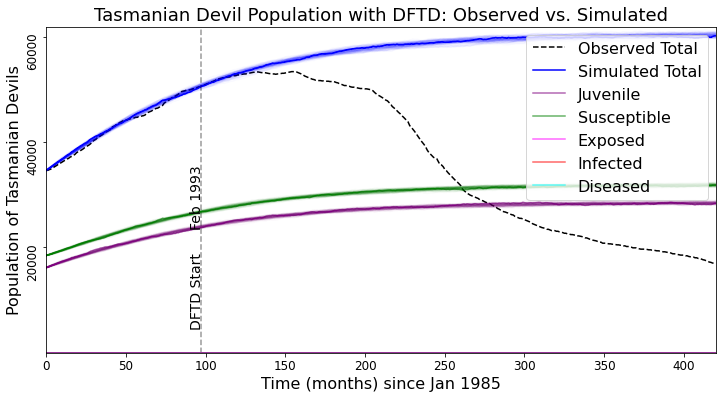

In [13]:
plot_eresult(eresults2)

<ipython-input-21-e0273e319b2e>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Number of Devils 60148.0 at simulation end, 97.2% of target carrying capacity


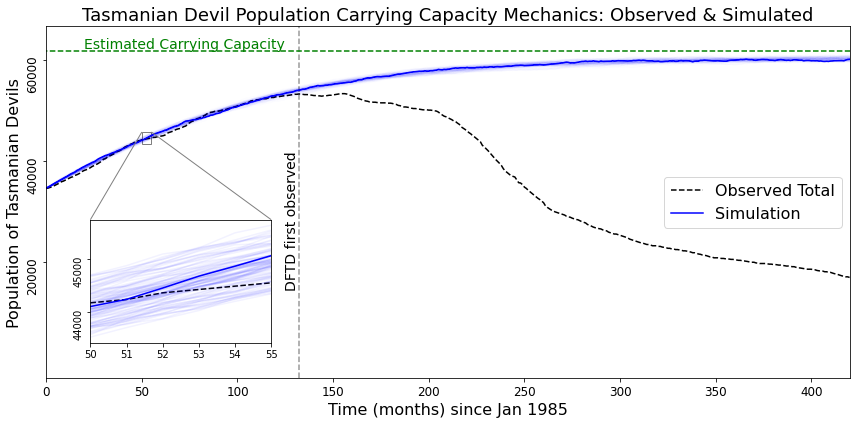

In [21]:
result = eresults2
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
fig, ax1 = plt.subplots(figsize=[12, 6])

plt.title("Tasmanian Devil Population Carrying Capacity Mechanics: Observed & Simulated", fontsize=18)
ax1.set_xlabel(f"Time (months) since {dates[0]}", fontsize=16)
ax1.set_ylabel("Population of Tasmanian Devils", fontsize=16)
ax1.plot([132, 132], [-3000, max(devil_pop)*1.25], '--k', alpha=0.4)
ax1.plot([-15, result[0]['time'][-1] + 15], [carry_cap, carry_cap], '--g')
ax1.text(20, carry_cap + 500, "Estimated Carrying Capacity", color="green", fontsize=14)
ax1.text(125, 15000, "DFTD first observed", rotation="vertical", color="black", fontsize=14)
#ax1.set_xticks(fontsize=12)
#ax1.set_yticks(fontsize=12, rotation="vertical", va="center")

ax1.plot(range(len(devil_pop)), devil_pop, '--k', label='Observed Total')
ax1.plot(result[0]['Devils'],'b', label="Simulation")

ax1.set_xlim([0, result[0]['time'][-1]])
ax1.set_ylim([-3000, max(devil_pop)*1.25])
ax1.tick_params(axis='x', labelsize=12)
ax1.set_yticks([20000,40000,60000])
ax1.tick_params(axis='y',labelsize=12, labelrotation=90)
ax1.legend(loc='center right', fontsize=16)

for n,r in enumerate(result):
    if n==0: continue
    ax1.plot(result[n]['Devils'],'b', alpha=0.01)

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.055,0.1,0.225,0.35])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=1, fc="none", ec='0.5')

# plot in the inset
inst=50
ined=56
ax2.plot(range(len(devil_pop))[inst:ined], devil_pop[inst:ined], '--k', label='Observed Total')
ax2.plot(result[0]['time'][inst:ined], result[0]['Devils'][inst:ined],'b', label="Simulation")
ax2.set_xlim(inst,ined-1)
ax2.set_yticks([44000,45000,46000])
ax2.tick_params(axis='y', labelrotation=90)

for n,r in enumerate(result):
    if n==0: continue
    ax2.plot(result[n]['time'][inst:ined], result[n]['Devils'][inst:ined],'b', alpha=0.05)

fig.tight_layout()
plt.savefig("figure3A.pdf")

final_devil_pop = result[0]['Devils'][-1]

print(f"Number of Devils {final_devil_pop} at simulation end,",
      f"{final_devil_pop/carry_cap*100:.1f}% of target carrying capacity")

{'juvenile_concentration': 0.49534348836011316, 'birth_rate': 0.055, 'maturity_rate': 0.04167, 'death_rate_juvenile': 0.006, 'death_rate_over_population': 2.3e-07, 'death_rate_susceptible': 0.02335, 'incubation': 10, 'progression': 10.746230534983676, 'infection_rate_diseased': 3.2e-05, 'infection_rate_infected': 1.1e-05, 'death_rate_diseased': 0.29134996217062514, 'death_rate_infected': 0.01966, 'DFTD_start': 97}
L2 = 60822.16 +/-18278.18


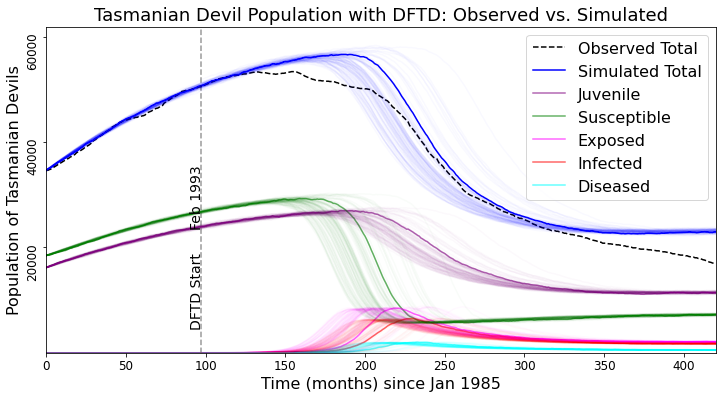

In [14]:
plot_eresult(eresults)

<ipython-input-37-7bd19ea54b45>:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


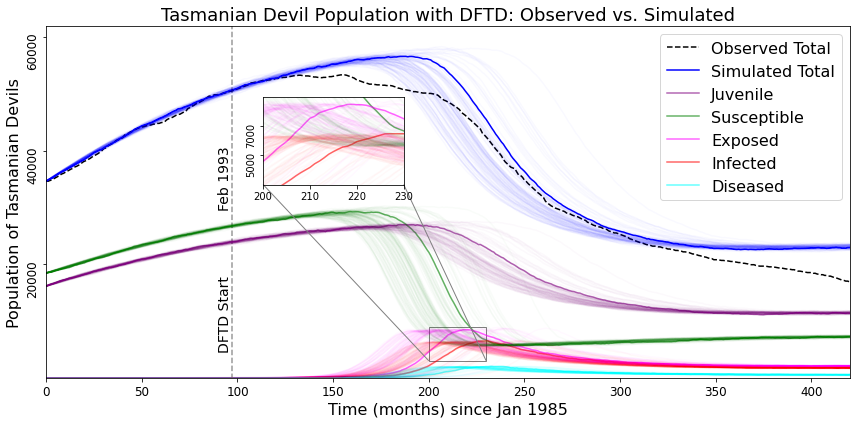

In [37]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
fig, ax1 = plt.subplots(figsize=[12, 6])

plt.title("Tasmanian Devil Population with DFTD: Observed vs. Simulated", fontsize=18)
ax1.set_xlabel(f"Time (months) since {dates[0]}", fontsize=16)
ax1.set_ylabel("Population of Tasmanian Devils", fontsize=16)
ax1.plot(eresults[0]['time'], obs[0][0], '--', color='black', label='Observed Total')
ax1.plot(eresults[0]['time'], eresults[0]['Devils'], color='blue', label='Simulated Total')
ax1.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
ax1.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
ax1.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
ax1.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
ax1.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
ax1.plot([variables['DFTD_start'], variables['DFTD_start']], [-3000, carry_cap], '--k', alpha=0.4)
ax1.text(variables['DFTD_start']-7, 5000, "DFTD Start", rotation="vertical", color="black", fontsize=14)
ax1.text(variables['DFTD_start']-7, 30000, dates[variables['DFTD_start']], rotation="vertical", color="black", fontsize=14)
#ax1.set_xlim([0, result[0]['time'][-1]])
#ax1.set_ylim([-3000, max(devil_pop)*1.25])
ax1.tick_params(axis='x', labelsize=12)
ax1.set_yticks([20000,40000,60000])
ax1.tick_params(axis='y',labelsize=12, labelrotation=90)
ax1.legend(loc='upper right', fontsize=16)
ax1.set_ylim([0, carry_cap])
ax1.set_xlim(0,eresults[0]['time'][-1])
for n,r in enumerate(eresults):
    if n==0: continue
    ax1.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.025)
    ax1.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
    ax1.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
    ax1.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
    ax1.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
    ax1.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')

ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.27,0.55,0.175,0.25])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=4, loc2=3, fc="none", ec='0.5')

# plot in the inset
inst=200
ined=inst+31
#ax2.plot(range(len(devil_pop))[inst:ined], devil_pop[inst:ined], '--k', label='Observed Total')
#ax2.plot(eresults[0]['time'][inst:ined], eresults[0]['Devils'][inst:ined],'b', label="Simulation")
ax2.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
ax2.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
ax2.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
ax2.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
ax2.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
for n,r in enumerate(eresults):
    if n==0: continue
    #ax2.plot(eresults[n]['time'][inst:ined], eresults[n]['Devils'][inst:ined],'b', alpha=0.05)
    ax2.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.03)
    ax2.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
    ax2.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
    ax2.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
    ax2.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
    ax2.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')
ax2.set_xlim(inst,ined-1)
ax2.set_ylim(3000,9000)
ax2.set_yticks([5000,7000])
ax2.tick_params(axis='y', labelrotation=90)
    
plt.tight_layout()
#plt.savefig("DevilsDFTD_Data_DFTDsim.pdf")
plt.savefig("figure3B.pdf")

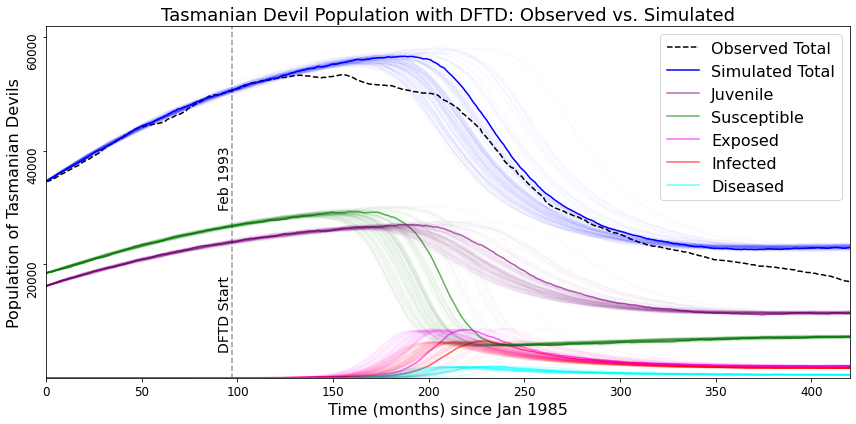

In [94]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
fig, ax1 = plt.subplots(figsize=[12, 6])

plt.title("Tasmanian Devil Population with DFTD: Observed vs. Simulated", fontsize=18)
ax1.set_xlabel(f"Time (months) since {dates[0]}", fontsize=16)
ax1.set_ylabel("Population of Tasmanian Devils", fontsize=16)
ax1.plot(eresults[0]['time'], obs[0][0], '--', color='black', label='Observed Total')
ax1.plot(eresults[0]['time'], eresults[0]['Devils'], color='blue', label='Simulated Total')
ax1.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
ax1.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
ax1.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
ax1.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
ax1.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
ax1.plot([variables['DFTD_start'], variables['DFTD_start']], [-3000, carry_cap], '--k', alpha=0.4)
ax1.text(variables['DFTD_start']-7, 5000, "DFTD Start", rotation="vertical", color="black", fontsize=14)
ax1.text(variables['DFTD_start']-7, 30000, dates[variables['DFTD_start']], rotation="vertical", color="black", fontsize=14)
#ax1.set_xlim([0, result[0]['time'][-1]])
#ax1.set_ylim([-3000, max(devil_pop)*1.25])
ax1.tick_params(axis='x', labelsize=12)
ax1.set_yticks([20000,40000,60000])
ax1.tick_params(axis='y',labelsize=12, labelrotation=90)
ax1.legend(loc='upper right', fontsize=16)
ax1.set_ylim([0, carry_cap])
ax1.set_xlim(0,eresults[0]['time'][-1])
for n,r in enumerate(eresults):
    if n==0: continue
    ax1.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.025)
    ax1.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
    ax1.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
    ax1.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
    ax1.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
    ax1.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')

# ax2 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.27,0.55,0.175,0.25])
# ax2.set_axes_locator(ip)
# # Mark the region corresponding to the inset axes on ax1 and draw lines
# # in grey linking the two axes.
# mark_inset(ax1, ax2, loc1=4, loc2=3, fc="none", ec='0.5')

# # plot in the inset
# inst=200
# ined=inst+31
# ax2.plot(eresults[0]['time'], eresults[0]['Juvenile'], color='purple', alpha=.6, label='Juvenile')
# ax2.plot(eresults[0]['time'], eresults[0]['Susceptible'], color='green', alpha=.6, label='Susceptible')
# ax2.plot(eresults[0]['time'], eresults[0]['Exposed'], color='magenta', alpha=.6, label='Exposed')
# ax2.plot(eresults[0]['time'], eresults[0]['Infected'], color='red', alpha=.6, label='Infected')
# ax2.plot(eresults[0]['time'], eresults[0]['Diseased'], color='cyan', alpha=.6, label='Diseased')
# for n,r in enumerate(eresults):
#     if n==0: continue
#     #ax2.plot(eresults[n]['time'][inst:ined], eresults[n]['Devils'][inst:ined],'b', alpha=0.05)
#     ax2.plot(eresults[n]['time'], eresults[n]['Devils'],'b', alpha=0.03)
#     ax2.plot(eresults[n]['time'], eresults[n]['Juvenile'], color='purple', alpha=0.025, label='Juvenile')
#     ax2.plot(eresults[n]['time'], eresults[n]['Susceptible'], color='green', alpha=0.025, label='Susceptible')
#     ax2.plot(eresults[n]['time'], eresults[n]['Exposed'], color='magenta', alpha=0.025, label='Exposed')
#     ax2.plot(eresults[n]['time'], eresults[n]['Infected'], color='red', alpha=0.025, label='Infected')
#     ax2.plot(eresults[n]['time'], eresults[n]['Diseased'], color='cyan', alpha=0.025, label='Diseased')
# ax2.set_xlim(inst,ined-1)
# ax2.set_ylim(3000,9000)
# ax2.set_yticks([5000,7000])
# ax2.tick_params(axis='y', labelrotation=90)
    
plt.tight_layout()
#plt.savefig("DevilsDFTD_Data_DFTDsim.pdf")
plt.savefig("figure3B_no_inset.pdf")

## Plots for Figure 4

In [42]:
pltcnt=3
pltcnt%2

1

In [65]:
print(variables['infection_rate_infected'])
sweeps['infection_rate_infected'][4]

1.1e-05


'1.1275e-05'

In [163]:
def plot_sweep2(name,nr,nc,np):
    global pltcnt
    xvals = numpy.zeros(len(sweeps[name]))
    mvals = numpy.zeros(len(sweeps[name]))
    svals = numpy.zeros(len(sweeps[name]))
    for n,v in enumerate(sweeps[name]):
        c = variables.copy()
        c[name] = float(v)
        try:
            (m,s) = get_mean_std(c)
            xvals[n]=c[name]
            mvals[n]=m
            svals[n]=s
        except Exception as e:
            print(f"caught e={e} while name={name} ")
    
    ax1=plt.subplot(nr,nc,np)
    ax1.errorbar(xvals,mvals,yerr=svals, capsize=10)
    ax1.plot([variables[name], variables[name]],[0, 100000],'--')
    #ax1.xlabel(name, fontsize=12)
    ax1.text(float(sweeps[name][-1]), 10000, name, fontsize=16, ha='right')
    ax1.set_ylim(0,100000)
    if pltcnt%2==1:
        ax1.set_ylabel('Error', fontsize=14)
        ax1.set_yticks([25000, 50000, 75000])
        ax1.tick_params('y', labelsize=14)
    else:
        ax1.set_yticks([])
    ax1.tick_params('x', labelsize=14)


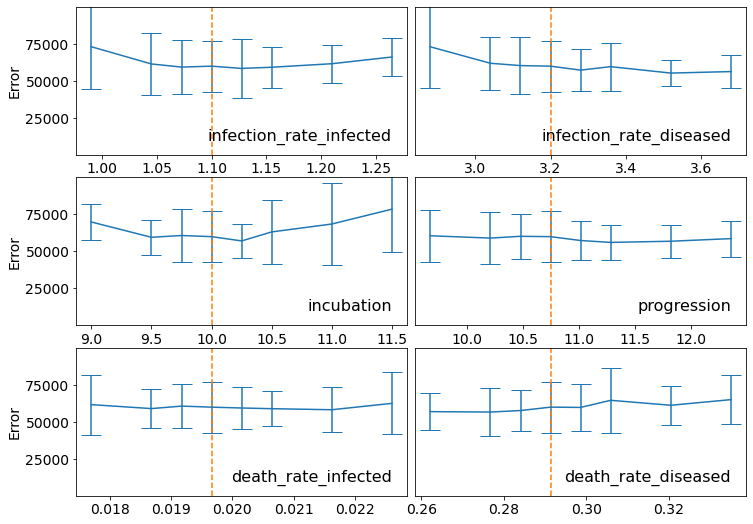

In [169]:
plt.figure(figsize=[12, 9])
pltcnt=1
plot_sweep2('infection_rate_infected',3, 2, pltcnt);pltcnt+=1
plot_sweep2('infection_rate_diseased',3, 2, pltcnt);pltcnt+=1
plot_sweep2('incubation',3, 2, pltcnt);pltcnt+=1
plot_sweep2('progression',3, 2, pltcnt);pltcnt+=1
plot_sweep2('death_rate_infected',3, 2, pltcnt);pltcnt+=1
plot_sweep2('death_rate_diseased',3, 2, pltcnt);pltcnt+=1
#plt.tight_layout()
plt.subplots_adjust(wspace=0.025,hspace=0.15)
plt.savefig('figure4A.pdf')


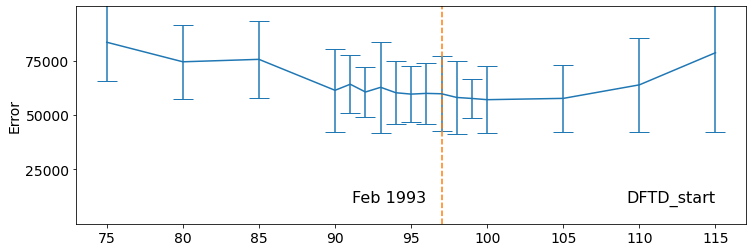

In [171]:
plt.figure(figsize=[12, 4])
plot_sweep2('DFTD_start',1,1,1)
plt.text(96,10000,"Feb 1993",ha='right', fontsize=16)
#plt.tight_layout()
plt.savefig('figure4B.pdf')


In [70]:
?plt.subplot

# Check the non-dftd parameters

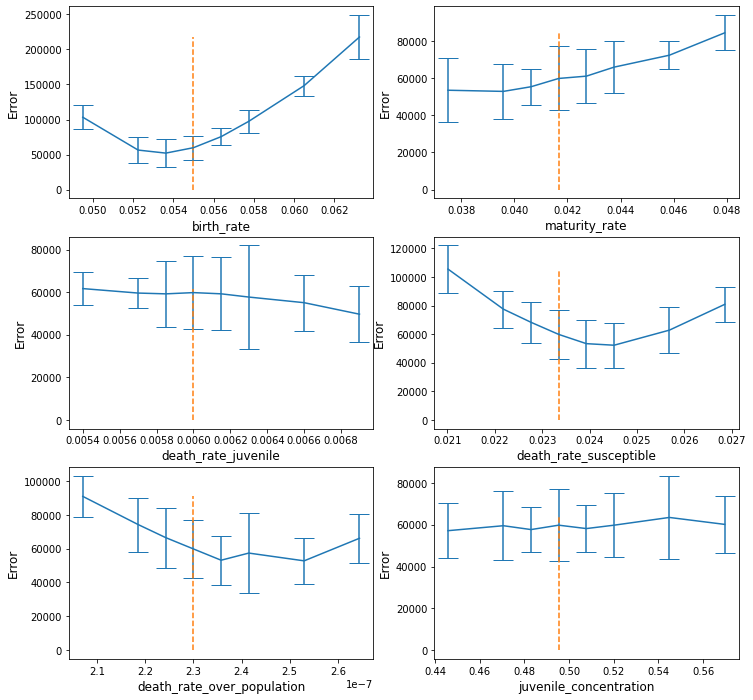

In [17]:
plt.figure(figsize=[12, 12])
pltcnt=1
plot_sweep2('birth_rate',3, 2, pltcnt);pltcnt+=1
plot_sweep2('maturity_rate',3, 2, pltcnt);pltcnt+=1
plot_sweep2('death_rate_juvenile',3, 2, pltcnt);pltcnt+=1
plot_sweep2('death_rate_susceptible',3, 2, pltcnt);pltcnt+=1
plot_sweep2('death_rate_over_population',3, 2, pltcnt);pltcnt+=1
plot_sweep2('juvenile_concentration',3, 2, pltcnt);pltcnt+=1

